# Resultados de las simulaciones

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
def cargar_y_graficar_uso_red(nombre_archivo):
    # Carga el archivo principal y el archivo actual
    df_proyecto = pd.read_excel(f"{nombre_archivo}.xlsx")
    df_actual = pd.read_excel(f"{nombre_archivo}_act.xlsx")
    
    # Diccionarios de configuración para cada escenario
    config_proyecto = {'plan_mbps': 300, 'R1': 300, 'R2': 75, 'R3': 125}
    config_actual = {'plan_mbps': 75, 'R1': 50, 'R2': 25}
    
    # Configuración para gráficas del proyecto
    routers_proyecto = ['R1', 'R2', 'R3']
    for router in routers_proyecto:
        plt.figure(figsize=(10, 4))
        plt.plot(df_proyecto[router], label='Simulaciones')
        plt.fill_between(x=df_actual.index, y1=0, y2=df_proyecto[router], color='blue', alpha=0.2)
        limite_router = config_proyecto.get(router, 0)
        limite_80_router = int(limite_router * 0.8)
        
        # Líneas del valor asignado y al 80%
        plt.axhline(y=limite_router, color='red', linestyle='-', label=f'Mbps Asignados ({limite_router} Mbps)')
        plt.axhline(y=limite_80_router, color='orange', linestyle='--', label=f'80% Mbps Asignados ({limite_80_router} Mbps)')
        
        # Área roja del 80% al máximo valor de simulación
        max_value = int(df_proyecto[router].max())
        plt.fill_between(x=df_proyecto.index, y1=limite_80_router, y2=max(max_value, limite_router), color='red', alpha=0.3)
        
        # Estadísticas
        promedio_router = df_proyecto[router].mean()
        desv_router = df_proyecto[router].std()
        mbps_sobre_80 = df_proyecto[router][df_proyecto[router] > limite_80_router].sum() - limite_80_router * len(df_proyecto[router][df_proyecto[router] > limite_80_router])
        mbps_sobre_100 = df_proyecto[router][df_proyecto[router] > limite_router].sum() - limite_router * len(df_proyecto[router][df_proyecto[router] > limite_router])
        
        plt.legend(title=f'Promedio: {promedio_router:.2f}, Desviación: {desv_router:.2f}, Mbps >80%: {mbps_sobre_80}, Mbps >100%: {mbps_sobre_100}',loc='upper right')
        plt.title(f'Simulación {nombre_archivo} {router} - Proyecto')
        plt.xlabel('Simulación')
        plt.ylabel('Mbps')
        plt.ylim(0, 300)
        plt.xlim(0, 30)

        plt.show()

    # Configuración para gráficas del actual
    routers_actual = ['R1', 'R2']
    for router in routers_actual:
        plt.figure(figsize=(10, 4))
        plt.plot(df_actual[router], label='Simulaciones')
        plt.fill_between(x=df_actual.index, y1=0, y2=df_actual[router], color='blue', alpha=0.3)
        limite_act = config_actual.get(router, 0)
        limite_80_act = int(limite_act * 0.8)
        
        # Líneas del valor asignado y al 80%
        plt.axhline(y=limite_act, color='blue', linestyle='-', label=f'Mbps Asignados ({limite_act} Mbps)')
        plt.axhline(y=limite_80_act, color='green', linestyle='--', label=f'80% Mbps Asignados ({limite_80_act} Mbps)')

        # Área roja del 80% al máximo valor de simulación
        max_value = int(df_actual[router].max())
        plt.fill_between(x=df_actual.index, y1=limite_80_act, y2=max(max_value, limite_act), color='red', alpha=0.3)
        
        # Estadísticas
        promedio_act = df_actual[router].mean()
        desv_act = df_actual[router].std()
        mbps_sobre_80_act = df_actual[router][df_actual[router] > limite_80_act].sum() - limite_80_act * len(df_actual[router][df_actual[router] > limite_80_act])
        mbps_sobre_100_act = df_actual[router][df_actual[router] > limite_act].sum() - limite_act * len(df_actual[router][df_actual[router] > limite_act])
        
        plt.legend(title=f'Promedio: {promedio_act:.2f}, Desviación: {desv_act:.2f}, Mbps >80%: {mbps_sobre_80_act}, Mbps >100%: {mbps_sobre_100_act}', loc='upper right')
        plt.title(f'Simulación {nombre_archivo} {router} - Actual')
        plt.xlabel('Simulación')
        plt.ylabel('Mbps')
        plt.ylim(0, 300)
        plt.xlim(0, 30)
        plt.show()


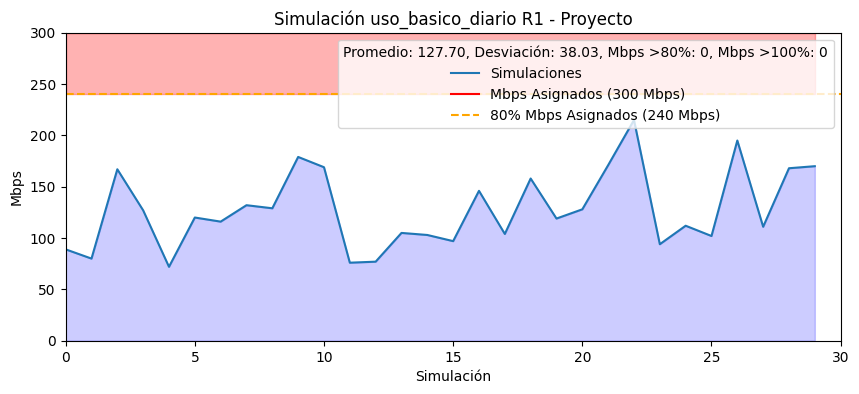

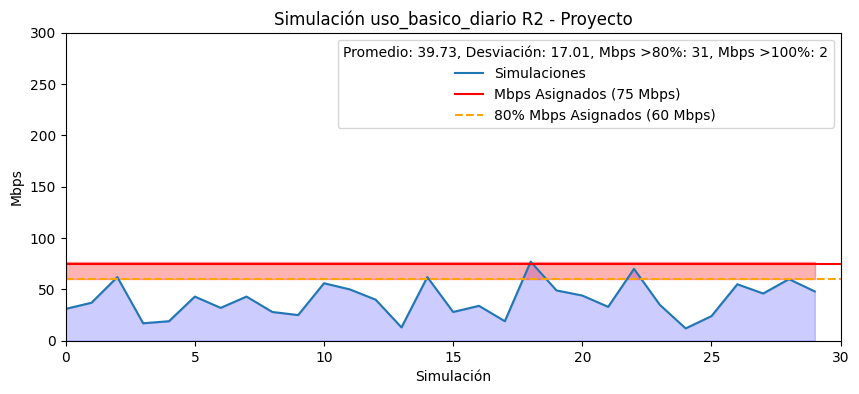

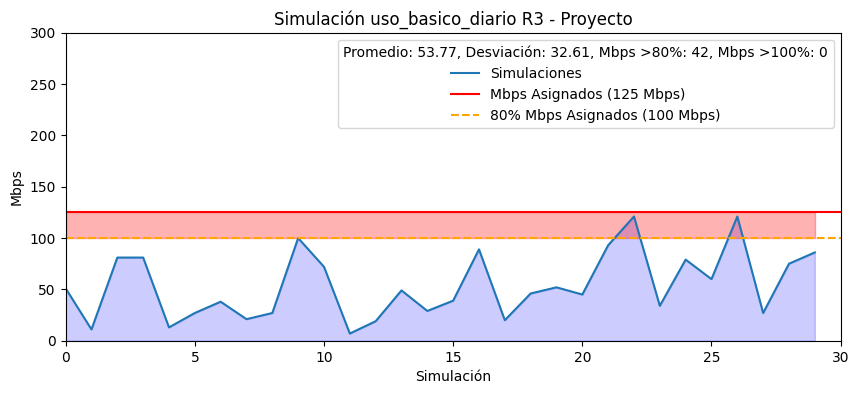

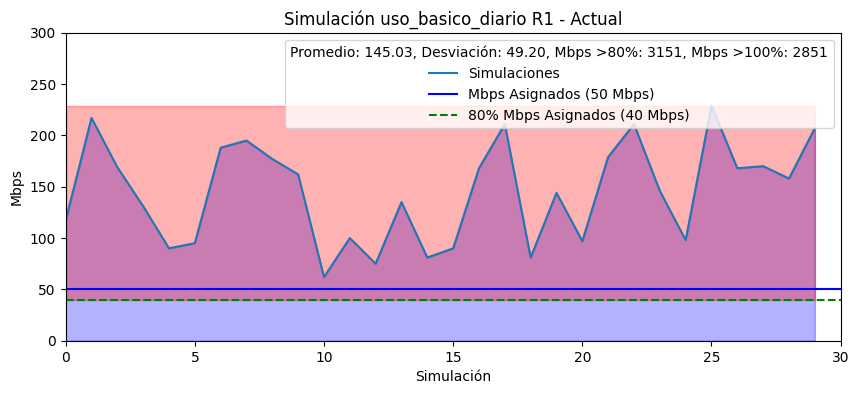

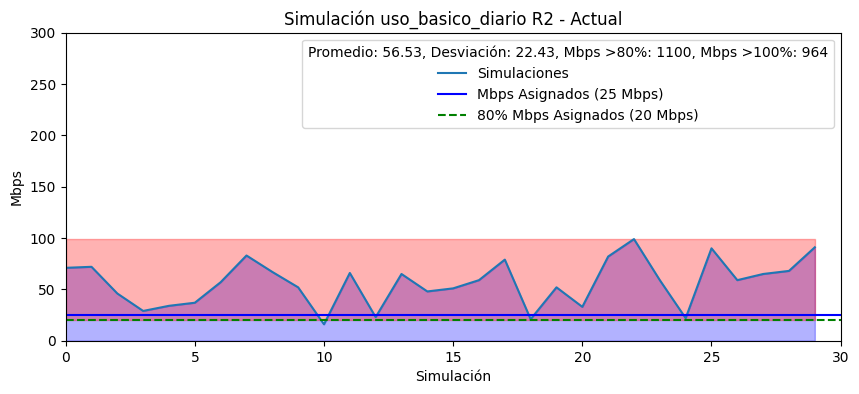

In [5]:
# Llamar a la función con el nombre base del archivo sin la extensión ni el sufijo '_act'
cargar_y_graficar_uso_red("uso_basico_diario")

In [6]:
def cargar_y_graficar_uso_areas(nombre_archivo_base):
    # Carga los archivos de Excel
    df_proyecto = pd.read_excel(f"{nombre_archivo_base}.xlsx")
    df_actual = pd.read_excel(f"{nombre_archivo_base}_act.xlsx")
    
    # Áreas privadas y comunes
    areas_privadas = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']
    areas_comunes = ['COCINA', 'JARDIN']
    
    # Plan de Mbps para cada escenario
    plan_proyecto = 300
    plan_actual = 75
    
    # Diccionarios para los DataFrames y nombres de escenarios
    dfs = {'Proyecto': (df_proyecto, plan_proyecto), 'Actual': (df_actual, plan_actual)}
    
    # Análisis y gráficas para cada tipo de área y cada escenario
    for nombre_escenario, (df, plan_mbps) in dfs.items():
        # Suma de todas las áreas privadas y comunes
        suma_mbps_privada = df[areas_privadas].sum(axis=1)
        suma_mbps_comun = df[areas_comunes].sum(axis=1)
        suma_total = suma_mbps_privada + suma_mbps_comun
        
        # Estadísticas básicas
        promedio_total = suma_total.mean()
        desviacion_total = suma_total.std()

        promedio_privada = suma_mbps_privada.mean()
        desviacion_privada = suma_mbps_privada.std()

        promedio_comun = suma_mbps_comun.mean()
        desviacion_comun = suma_mbps_comun.std()

        # Gráfico
        plt.figure(figsize=(10, 4))
        plt.fill_between(range(len(suma_total)), 0, suma_mbps_privada, label='Áreas Privadas', color='lightblue')
        plt.fill_between(range(len(suma_total)), suma_mbps_privada, suma_total, label='Áreas Comunes', color='lightgreen')
        plt.title(f'Simulación {nombre_archivo_base} - {nombre_escenario}')
        plt.xlabel('Simulación')
        plt.ylabel('Suma de Mbps')
        
        # Líneas importantes
        plt.axhline(promedio_total, color='red', linestyle='--', label=f'Promedio Total: {promedio_total:.2f} Mbps')
        plt.axhline(plan_mbps, color='purple', linestyle='-.', label=f'Plan de Mbps: {plan_mbps} Mbps')
        plt.axhline(plan_mbps * 0.8, color='orange', linestyle='-.', label=f'80% del Plan: {plan_mbps * 0.8:.2f} Mbps')
       
       # Textos de estadísticas individuales, posicionados justo debajo del título
        plt.text(0.01, 0.87, f'Promedio Áreas Privadas: {promedio_privada:.2f} Mbps, Desv: {desviacion_privada:.2f}', transform=plt.gca().transAxes, backgroundcolor='lightblue', fontsize=9)
        plt.text(0.01, 0.95, f'Promedio Áreas Comunes: {promedio_comun:.2f} Mbps, Desv: {desviacion_comun:.2f}', transform=plt.gca().transAxes, backgroundcolor='lightgreen', fontsize=9)

        plt.legend(loc='upper right')
        plt.ylim(0, 300)
        plt.xlim(0, 30)
        plt.show()



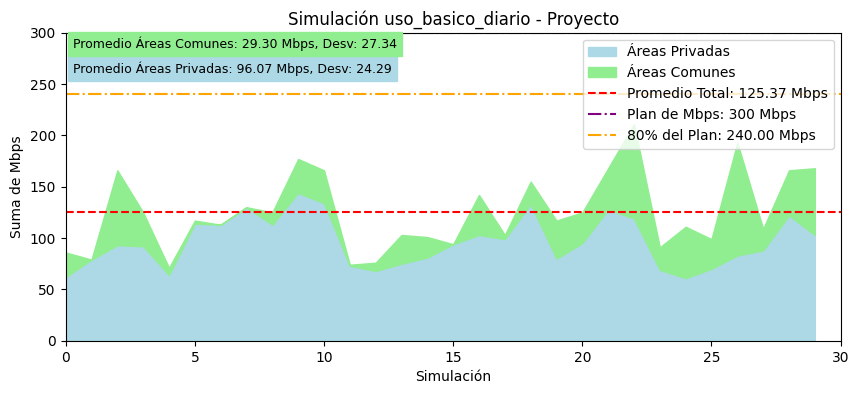

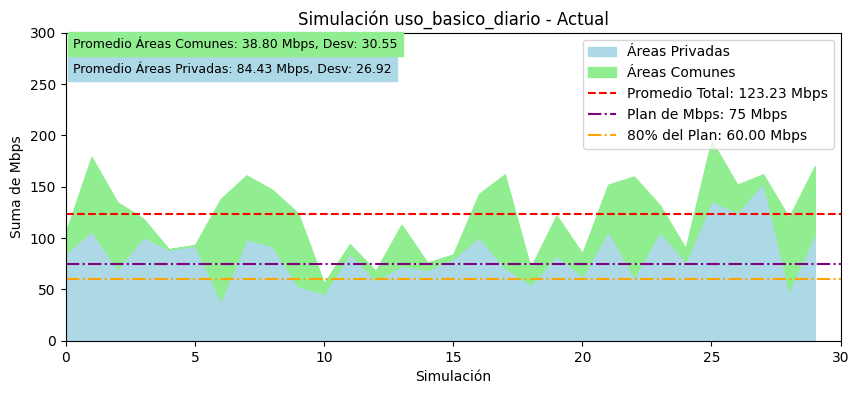

In [8]:
# Llamar a la función con el nombre base del archivo sin la extensión
cargar_y_graficar_uso_areas("uso_basico_diario")